In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [34]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
api_key = '55fd9f09c162a589ee26dc37ca266b12'
url     = "http://api.openweathermap.org/data/2.5/weather?"
units   = "metric"

# Build query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    #print(city)
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #response = requests.get(query_url + city).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data using query URL
        city_weather  = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat      = city_weather['coord']['lat']
        city_lng      = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds   = city_weather['clouds']['all']
        city_wind     = city_weather['wind']['speed']
        city_country  = city_weather['sys']['country']
        city_date     = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        #print(city_data)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | remire-montjoly
Processing Record 2 of Set 1 | i-n-salah
Processing Record 3 of Set 1 | fort mcmurray
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | al matariyah
Processing Record 8 of Set 1 | plettenberg bay
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | taoudenni
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | staunton
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | kerikeri
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | horta
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | t

Processing Record 41 of Set 4 | dudinka
Processing Record 42 of Set 4 | bilibino
Processing Record 43 of Set 4 | vanino
Processing Record 44 of Set 4 | crucecita
Processing Record 45 of Set 4 | slobodskoy
Processing Record 46 of Set 4 | vila franca do campo
Processing Record 47 of Set 4 | ashburton
Processing Record 48 of Set 4 | castillos
Processing Record 49 of Set 4 | valparaiso
Processing Record 0 of Set 5 | palangkaraya
Processing Record 1 of Set 5 | jaito
Processing Record 2 of Set 5 | san felipe
Processing Record 3 of Set 5 | kirakira
Processing Record 4 of Set 5 | alofi
Processing Record 5 of Set 5 | sona
Processing Record 6 of Set 5 | atafu village
Processing Record 7 of Set 5 | rosarito
Processing Record 8 of Set 5 | san julian
Processing Record 9 of Set 5 | namsos
Processing Record 10 of Set 5 | puerto ayacucho
Processing Record 11 of Set 5 | bamboo flat
Processing Record 12 of Set 5 | hailar
Processing Record 13 of Set 5 | romodanovo
Processing Record 14 of Set 5 | marte
Pr

Processing Record 30 of Set 8 | yacuiba
Processing Record 31 of Set 8 | dingzhou
Processing Record 32 of Set 8 | bathsheba
Processing Record 33 of Set 8 | mejit
Processing Record 34 of Set 8 | monguno
Processing Record 35 of Set 8 | soavinandriana
Processing Record 36 of Set 8 | austin
Processing Record 37 of Set 8 | motueka
Processing Record 38 of Set 8 | sinop
Processing Record 39 of Set 8 | savave village
City not found. Skipping...
Processing Record 40 of Set 8 | fort st. john
Processing Record 41 of Set 8 | launceston
Processing Record 42 of Set 8 | conduaga
Processing Record 43 of Set 8 | ola
Processing Record 44 of Set 8 | kudahuvadhoo
Processing Record 45 of Set 8 | urangan
Processing Record 46 of Set 8 | lakatoro
Processing Record 47 of Set 8 | usogorsk
Processing Record 48 of Set 8 | igrim
Processing Record 49 of Set 8 | alliance
Processing Record 0 of Set 9 | novo aripuana
Processing Record 1 of Set 9 | queenstown
Processing Record 2 of Set 9 | tarko-sale
Processing Record 3

Processing Record 17 of Set 12 | egilsstadir
Processing Record 18 of Set 12 | rodriguez
Processing Record 19 of Set 12 | krasnokholmskiy
Processing Record 20 of Set 12 | 'ohonua
City not found. Skipping...
Processing Record 21 of Set 12 | nouadhibou
Processing Record 22 of Set 12 | aktobe
Processing Record 23 of Set 12 | wenshui
Processing Record 24 of Set 12 | awjilah
Processing Record 25 of Set 12 | goundam
Processing Record 26 of Set 12 | rikaze
Processing Record 27 of Set 12 | calvinia
Processing Record 28 of Set 12 | hayma'
City not found. Skipping...
Processing Record 29 of Set 12 | kailua-kona
Processing Record 30 of Set 12 | olinda
Processing Record 31 of Set 12 | kulia village
City not found. Skipping...
Processing Record 32 of Set 12 | geraldton
Processing Record 33 of Set 12 | kashgar
Processing Record 34 of Set 12 | east ballina
Processing Record 35 of Set 12 | shimanovsk
Processing Record 36 of Set 12 | segorbe
Processing Record 37 of Set 12 | neelankarai
Processing Record

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,remire-montjoly,4.9167,-52.2667,28.02,74,75,3.09,GF,1708641268
1,i-n-salah,27.1935,2.4607,14.52,37,0,4.43,DZ,1708641269
2,fort mcmurray,56.7268,-111.3810,3.77,52,0,1.54,CA,1708641269
3,puerto natales,-51.7236,-72.4875,6.48,78,45,6.74,CL,1708640978
4,puerto ayora,-0.7393,-90.3518,30.98,93,93,1.34,EC,1708640979


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("Output/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,remire-montjoly,4.9167,-52.2667,28.02,74,75,3.09,GF,1708641268
1,i-n-salah,27.1935,2.4607,14.52,37,0,4.43,DZ,1708641269
2,fort mcmurray,56.7268,-111.3810,3.77,52,0,1.54,CA,1708641269
3,puerto natales,-51.7236,-72.4875,6.48,78,45,6.74,CL,1708640978
4,puerto ayora,-0.7393,-90.3518,30.98,93,93,1.34,EC,1708640979


In [41]:
# Convert datetime to the readable date format(year-month-date)
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,remire-montjoly,4.9167,-52.2667,28.02,74,75,3.09,GF,2024-02-22
1,i-n-salah,27.1935,2.4607,14.52,37,0,4.43,DZ,2024-02-22
2,fort mcmurray,56.7268,-111.3810,3.77,52,0,1.54,CA,2024-02-22
3,puerto natales,-51.7236,-72.4875,6.48,78,45,6.74,CL,2024-02-22
4,puerto ayora,-0.7393,-90.3518,30.98,93,93,1.34,EC,2024-02-22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


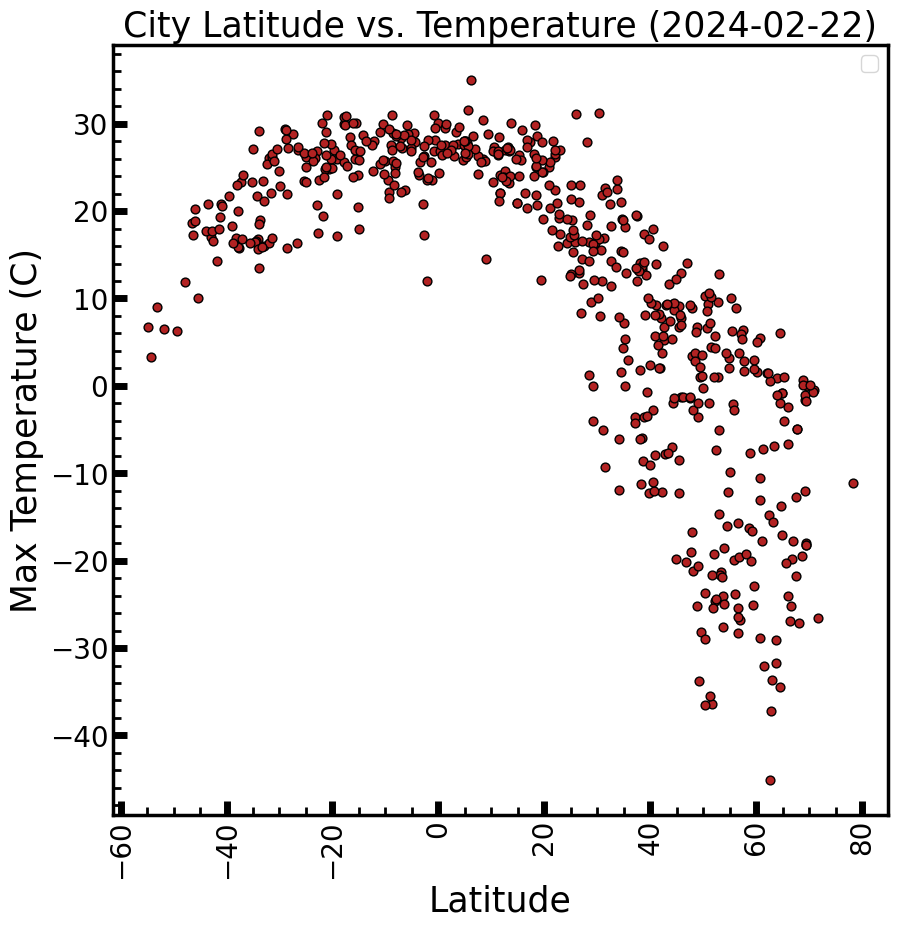

In [42]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

date=city_data_df['Date'].min()

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', s=40, color='firebrick', edgecolor='k')
plt.title(f"City Latitude vs. Temperature ({date})", fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('Max Temperature (C)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig1.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


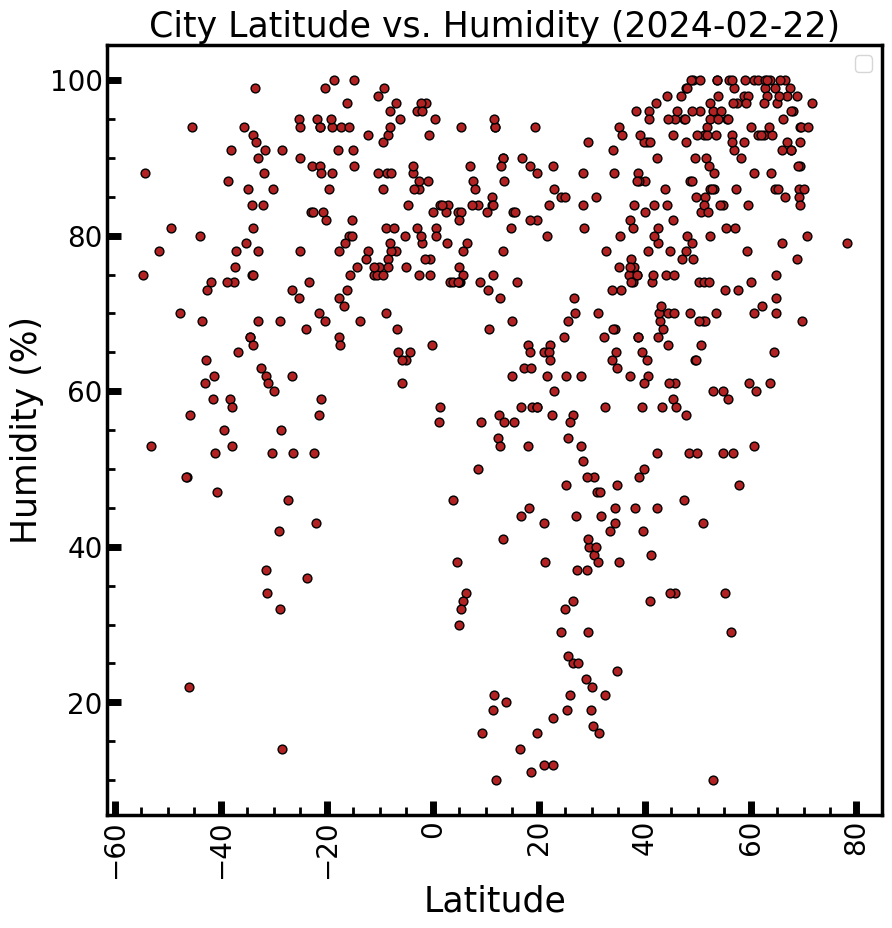

In [43]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', s=40, color='firebrick', edgecolor='k')
plt.title(f"City Latitude vs. Humidity ({date})", fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('Humidity (%)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig2.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


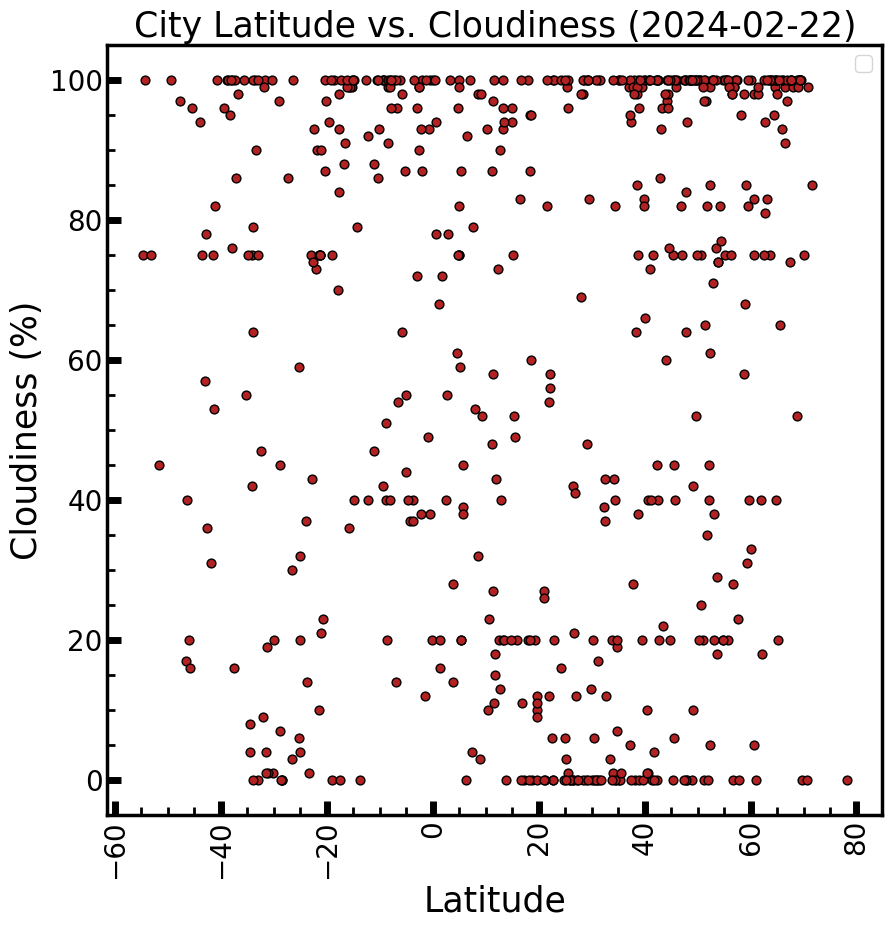

In [44]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', s=40, color='firebrick', edgecolor='k')
plt.title(f"City Latitude vs. Cloudiness ({date})", fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('Cloudiness (%)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig3.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


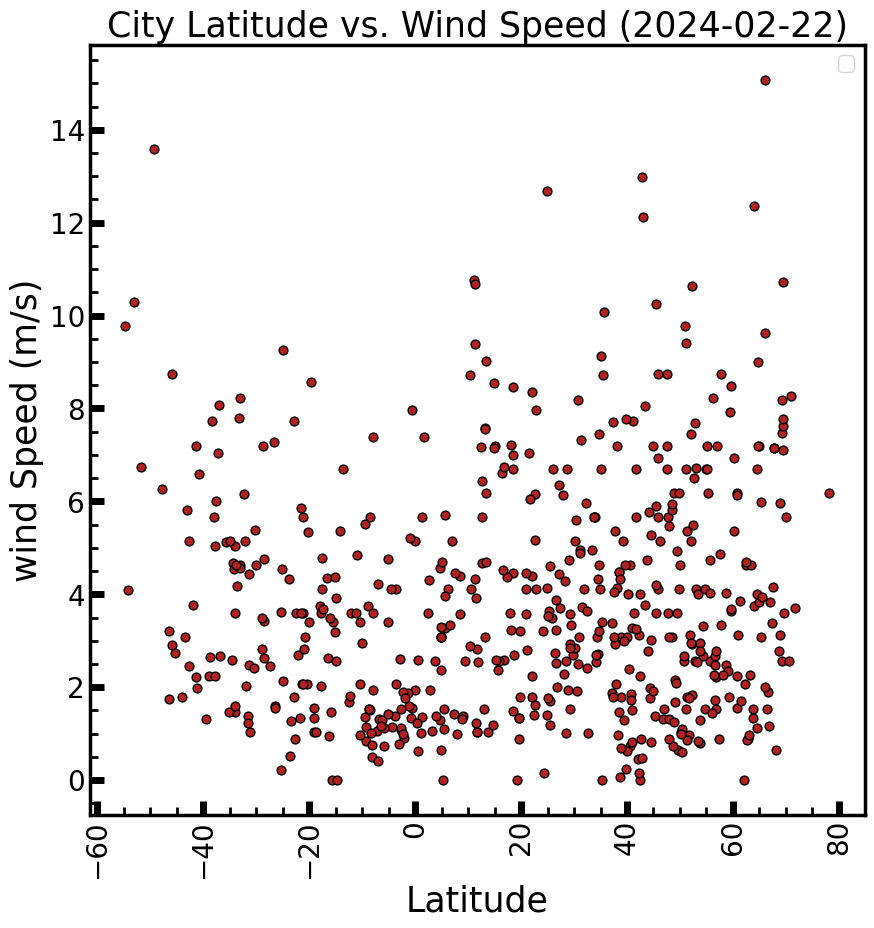

In [45]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', s=40, color='firebrick', edgecolor='k')
plt.title(f"City Latitude vs. Wind Speed ({date})", fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('wind Speed (m/s)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [46]:
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def reg(dataframe, x, y, output):
    
    # Add the linear regression equation and line to plot
    x_values = dataframe[x]
    y_values = dataframe[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values                             = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    fig = plt.figure(figsize=(10,10))
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 2.50
    plt.scatter(x_values,y_values, marker='o', s=40, color='firebrick', edgecolor='k')
    plt.plot(x_values,regress_values,"k-")
    plt.annotate(line_eq, (np.mean(x_values),np.mean(y_values)), fontsize=25, color="g")
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)
    plt.minorticks_on() 
    plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
    plt.tick_params(which='minor', length=6, width=2.0, direction='in')
    print(f"The r-value is: {rvalue}")
    plt.savefig(f"Output/ {output}")
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] > 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,remire-montjoly,4.9167,-52.2667,28.02,74,75,3.09,GF,2024-02-22
1,i-n-salah,27.1935,2.4607,14.52,37,0,4.43,DZ,2024-02-22
2,fort mcmurray,56.7268,-111.3810,3.77,52,0,1.54,CA,2024-02-22
5,anadyr,64.7500,177.4833,-13.72,72,40,9.00,RU,2024-02-22
6,al matariyah,31.1829,32.0311,16.97,70,100,4.95,EG,2024-02-22


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,6.48,78,45,6.74,CL,2024-02-22
4,puerto ayora,-0.7393,-90.3518,30.98,93,93,1.34,EC,2024-02-22
7,plettenberg bay,-34.0527,23.3716,16.78,75,75,1.47,ZA,2024-02-22
8,hithadhoo,-0.6000,73.0833,28.13,77,100,1.56,MV,2024-02-22
9,invercargill,-46.4000,168.3500,17.29,49,40,3.22,NZ,2024-02-22


###  Temperature vs. Latitude Linear Regression Plot


The r-value is: -0.8053632269159973


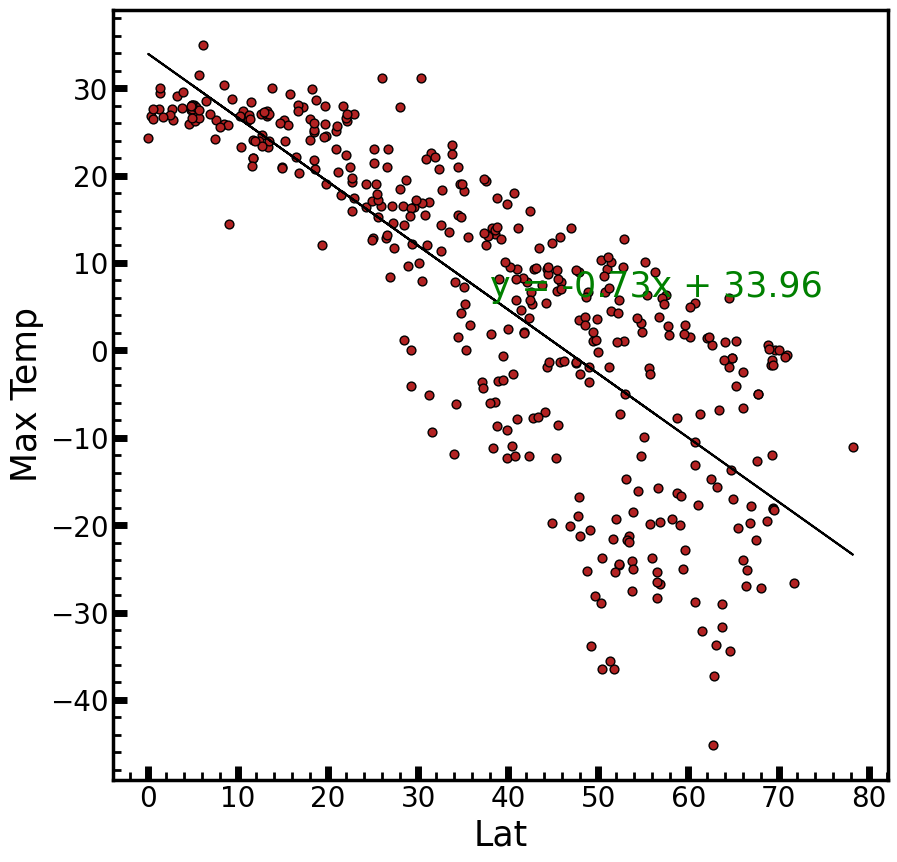

In [49]:
# Linear regression on Northern Hemisphere

reg(northern_hemi_df, "Lat", "Max Temp", "nMax")

The r-value is: 0.6495353343910508


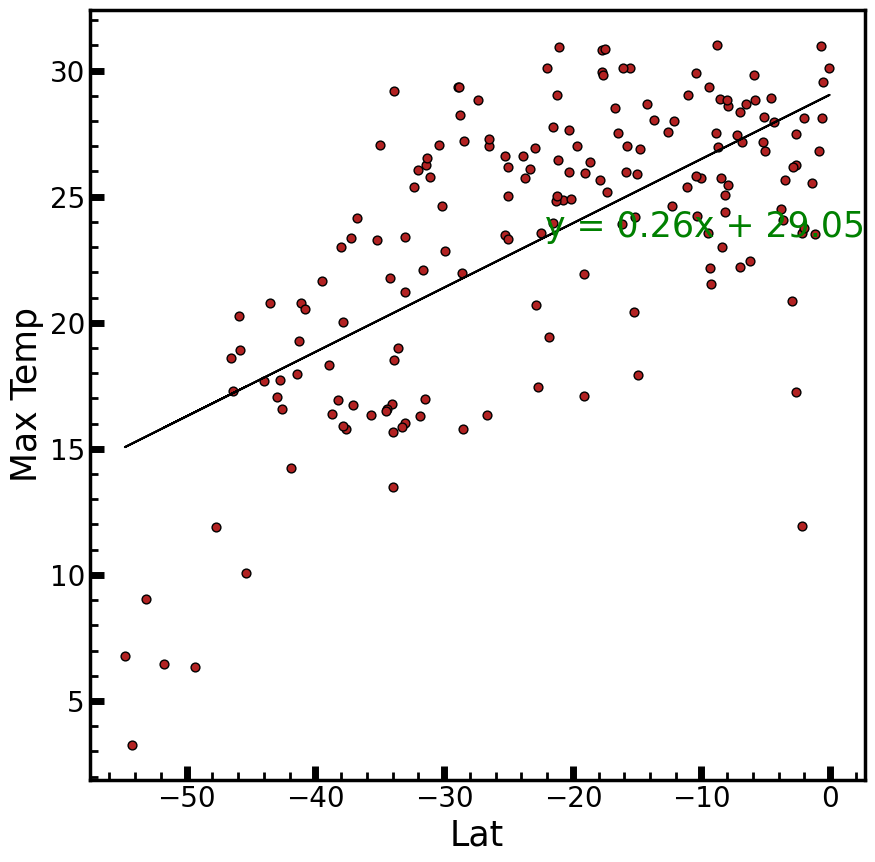

In [50]:
# Linear regression on Northern Hemisphere

reg(southern_hemi_df, "Lat", "Max Temp", "sMax")

**Discussion about the linear relationship:** For cities in the northern hemispere as latitude increases maximum temerperature of the cities decreases. For the southern hemispere as latitude decreases the maximum temperature of the cities decreases. Basically as move close to either north or south pole maximum temerature decreases as sunlight received decreases as one move away from equator towards poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.37372508359421247


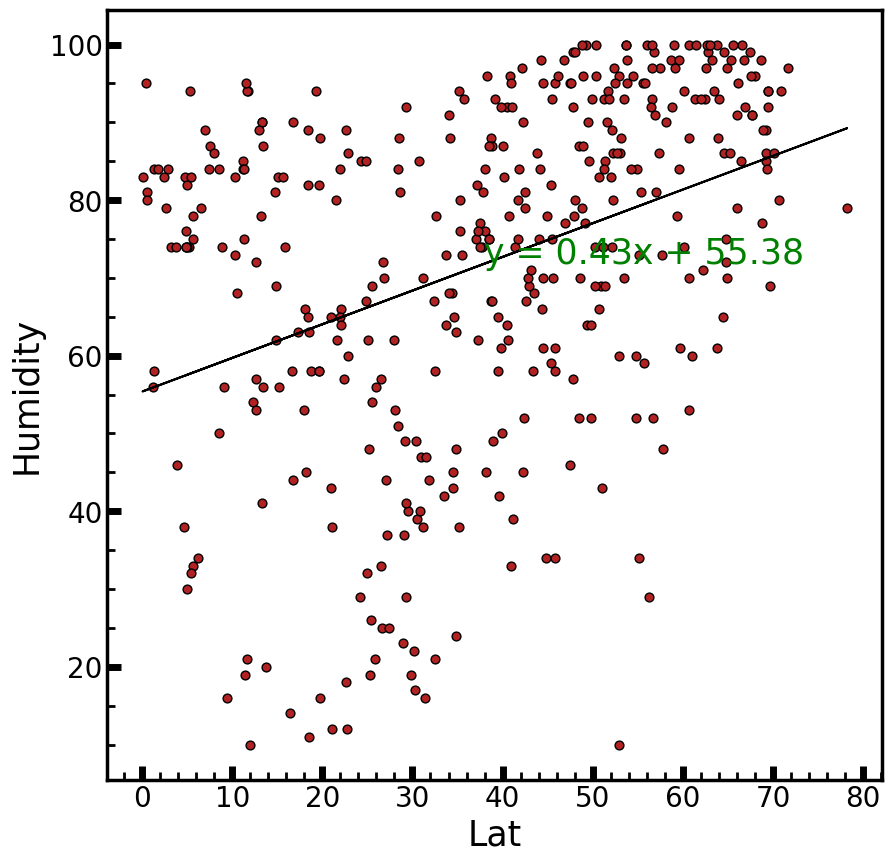

The r-value is: 0.3559927976381784


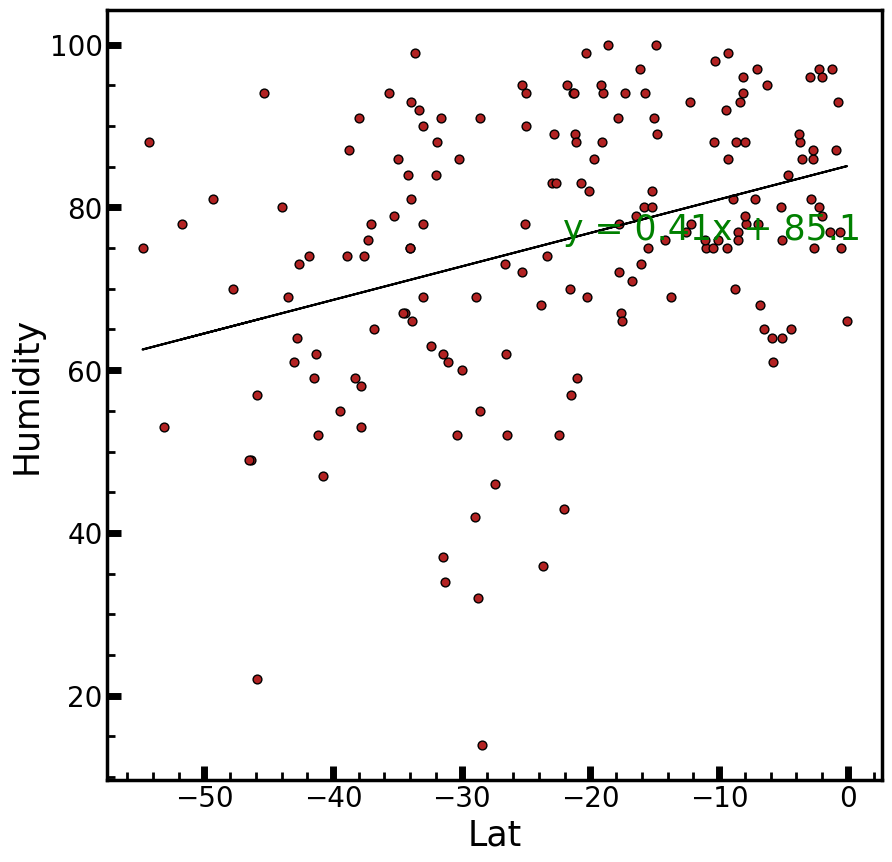

In [51]:
# Northern & Southern Hemisphere
reg(northern_hemi_df, "Lat", "Humidity", "nHum")
reg(southern_hemi_df, "Lat", "Humidity", "sHum")

**Discussion about the linear relationship:** The relation between Humidity and latitude is not tight and shows a significant scatter for both cities in the northern and the southen hemisphere. Hence conclusion cant be drawn. However with increase in latitude, humidity increases for both hemisheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2542474215620815


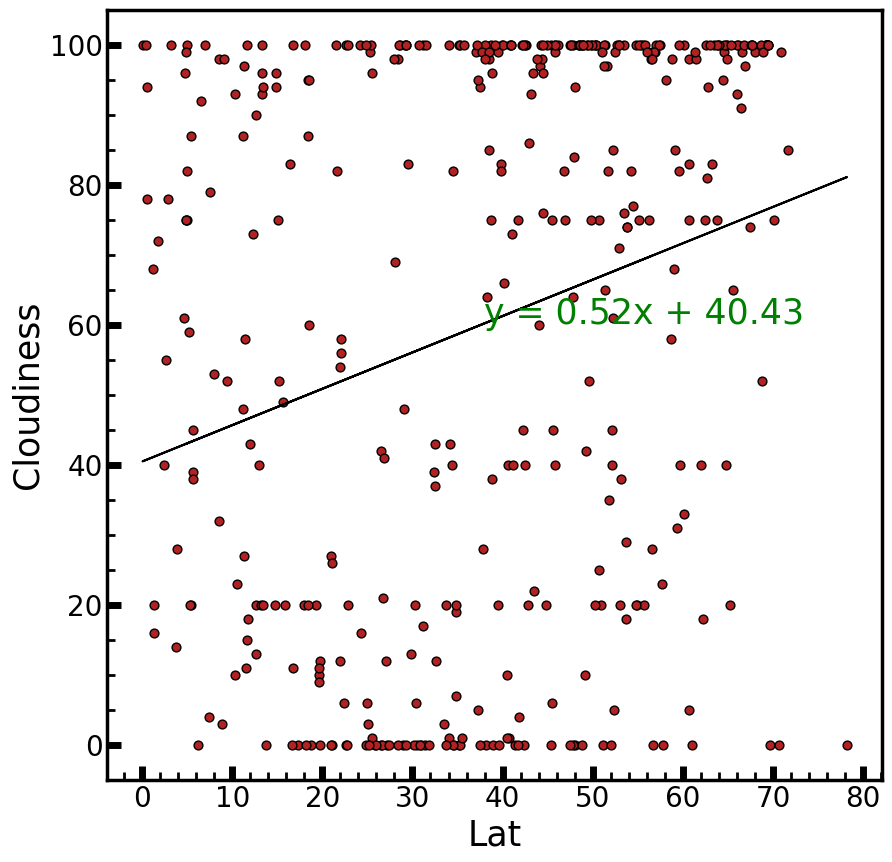

The r-value is: 0.13044776800798147


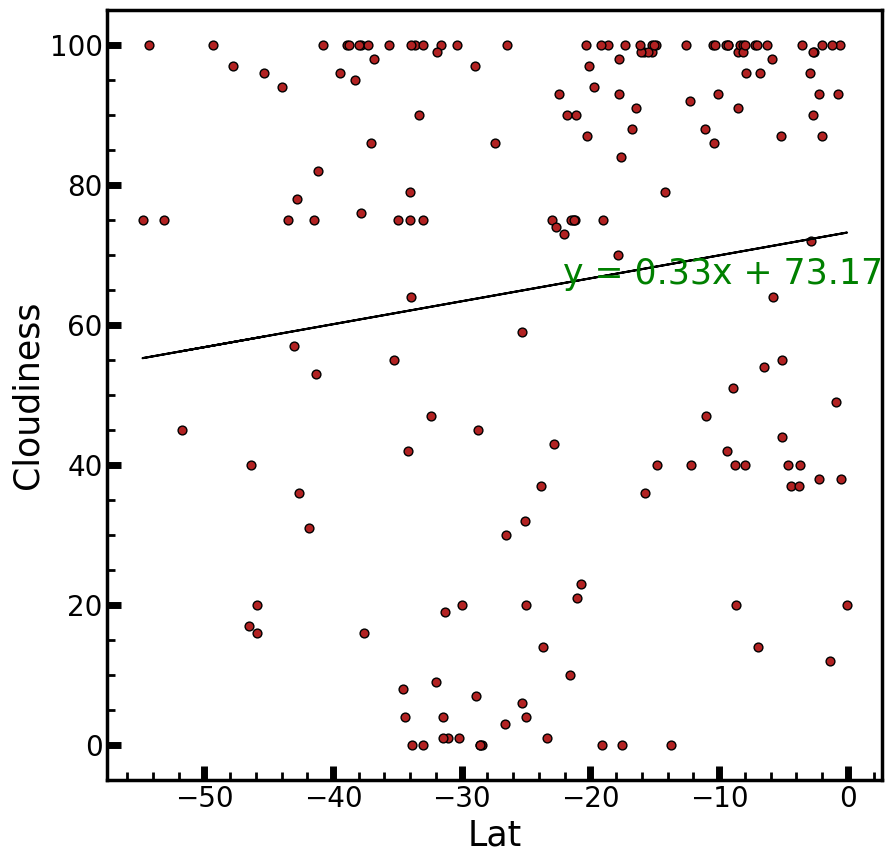

In [52]:
# Northern & Southern Hemisphere
reg(northern_hemi_df, "Lat", "Cloudiness", "nCloud")
reg(southern_hemi_df, "Lat", "Cloudiness", "sCloud")

**Discussion about the linear relationship:** The relation between Cloudiness and latitude is not tight and shows a significant scatter for both cities in the northern and the southen hemisphere. Hence conclusion cant be drawn. However with increase in the latitude, cloudiness increases for both hemisheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09465744824273933


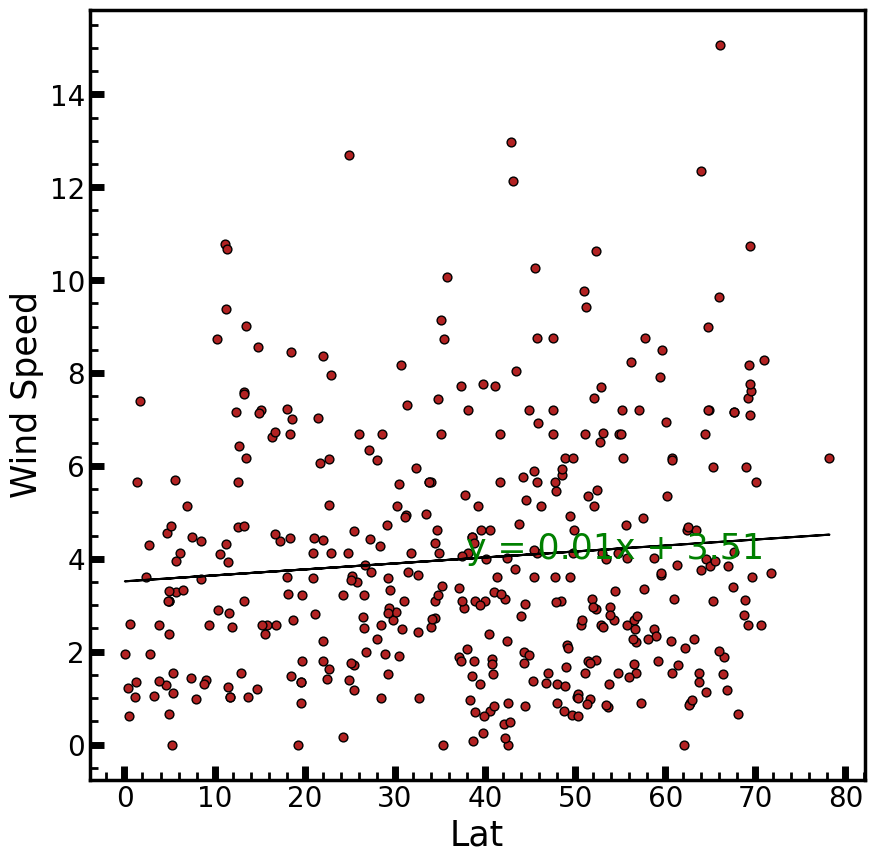

The r-value is: -0.4160673578986049


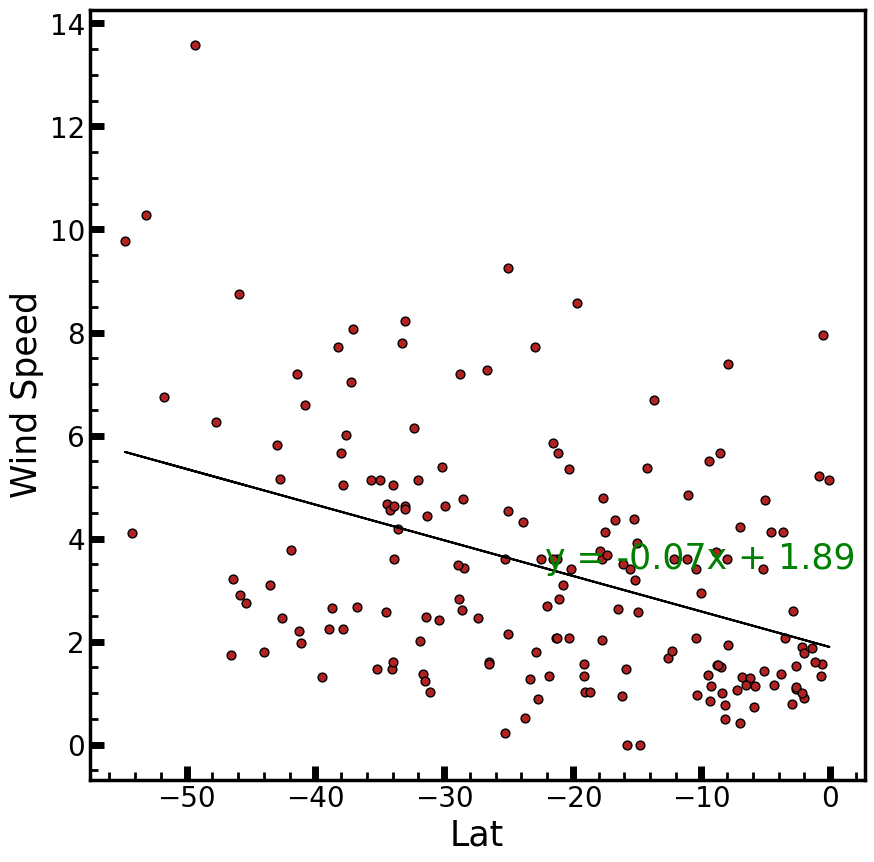

In [53]:
# Northern & Southern Hemisphere
reg(northern_hemi_df, "Lat", "Wind Speed", "nWind")
reg(southern_hemi_df, "Lat", "Wind Speed", "sWind")

**Discussion about the linear relationship:** For both cities in the northern and southern hemispheres, the relationship between cloudiness and latitude is not linear and exhibits a considerable spread. On the other hand, we can state that wind speed increases with distance from the equator. Since most of the continents and landmasses are in the northern hemisphere, this effect is more noticeable in the southern hemisphere. Nonetheless, the southern hemisphere has more oceans than landmasses, which permits interrupted wind flow.